In [26]:
import pystan
import numpy as np

In [45]:
leukemia_data = {'Nobs' : 10,
                'Ncens' : 10,
                'M' : 2,
                'yobs' : np.random.normal(12, size = 10),
                'ycens' : np.random.randint(12, size = 10),
                'Xobs' : np.random.randint(10, size = 20).reshape(10,2),
                'Xcens' : np.random.randint(10, size = 20).reshape(10,2)
                }

In [46]:
leukemia_data

{'M': 2, 'Ncens': 10, 'Nobs': 10, 'Xcens': array([[6, 8],
        [5, 9],
        [9, 4],
        [3, 2],
        [2, 2],
        [5, 3],
        [2, 1],
        [7, 8],
        [8, 3],
        [8, 0]]), 'Xobs': array([[5, 8],
        [7, 0],
        [6, 8],
        [3, 0],
        [4, 0],
        [1, 6],
        [3, 4],
        [1, 3],
        [2, 4],
        [6, 0]]), 'ycens': array([ 5, 11,  4,  3,  5,  2, 10,  5,  9,  0]), 'yobs': array([ 10.94571255,  13.22400513,  13.99563245,  12.66205032,
         10.9200179 ,  11.76503152,  12.675108  ,  10.73944715,
         13.45144162,  13.04326024])}

In [47]:
exp_code = """
/* obs :   number of samples where event occurred
   cens :  number of censored samples
   N :     number of total samples
   M :     number of covariates available 
   C : Censoring*/
   
data { 
  int<lower = 0> Nobs;
  int<lower = 0> Ncens;
  int<lower = 0> M;
  vector[Nobs] yobs;
  vector[Ncens] ycens;
  matrix[Nobs, M] Xobs;
  matrix[Ncens, M] Xcens;
  }
  
parameters {
  real<lower = 0> lambda;
  vector[M] beta;
}

model {
  yobs ~ exponential(lambda + Xobs * beta);
}
"""


In [48]:
sm = pystan.StanModel(model_code=exp_code)
fit = sm.sampling(data=leukemia_data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4ebe73965012703984a3dc098a1ff4fa NOW.


In [49]:
print(fit)

Inference for Stan model: anon_model_4ebe73965012703984a3dc098a1ff4fa.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda    0.11  6.5e-3   0.07 9.6e-3   0.06    0.1   0.15   0.28    107   1.04
beta[0] 4.1e-4  5.4e-4   0.01  -0.02-6.7e-3 9.1e-4 8.2e-3   0.02    427    1.0
beta[1]-5.6e-4  1.2e-3 9.8e-3  -0.03-5.2e-3 5.5e-5 5.5e-3   0.02     69   1.07
lp__    -39.16    0.16   1.54 -43.45 -39.82 -38.71 -38.04 -37.49     90   1.04

Samples were drawn using NUTS at Thu Jan 18 23:27:04 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [51]:
from matplotlib import pyplot as plt
import scipy
%matplotlib inline

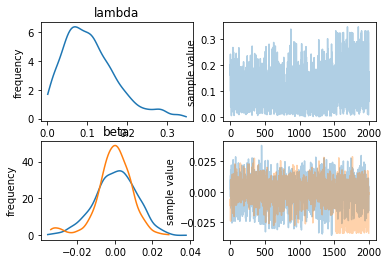

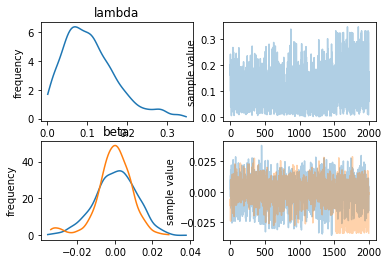

In [52]:
fit.plot()

In [ ]:
#Compare to model in survival stan

#transform to long or per time point
dlong = stancache.cached(
    survivalstan.prep_data_long_surv,
    df=d, event_col='event', time_col='t'
)